In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# =====================
# 1. Load Dataset (CIFAR-10)
# =====================
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values (0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [3]:
# =====================
# 2. Define Model Architecture
# =====================
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),       # Flatten 32x32x3 image
    Dense(512, activation='sigmoid'),       # Hidden layer
    Dense(256, activation='sigmoid'),       # Hidden layer
    Dense(10, activation='softmax')         # Output layer (10 classes)
])


C:\Users\aryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# =====================
# 3. Compile Model (SGD optimizer)
# =====================
model.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
# =====================
# 4. Train Model
# =====================
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10,
                    batch_size=64)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.1341 - loss: 2.3053 - val_accuracy: 0.1933 - val_loss: 2.2271
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.2291 - loss: 2.2023 - val_accuracy: 0.2423 - val_loss: 2.1370
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.2619 - loss: 2.1154 - val_accuracy: 0.2931 - val_loss: 2.0577
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.2859 - loss: 2.0416 - val_accuracy: 0.2989 - val_loss: 2.0043
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.2923 - loss: 1.9999 - val_accuracy: 0.2964 - val_loss: 1.9721
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.3045 - loss: 1.9616 - val_accuracy: 0.3175 - val_loss: 1.9443
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.3172 - loss: 1.9353 - val_accuracy: 0.3139 - val_loss: 1.9219
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 21ms/step - accuracy: 0.3262 - loss: 1.9099 - 

In [6]:
# =====================
# 5. Evaluate Model
# =====================
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy on CIFAR-10: {acc*100:.2f}%")

Test Accuracy on CIFAR-10: 33.27%


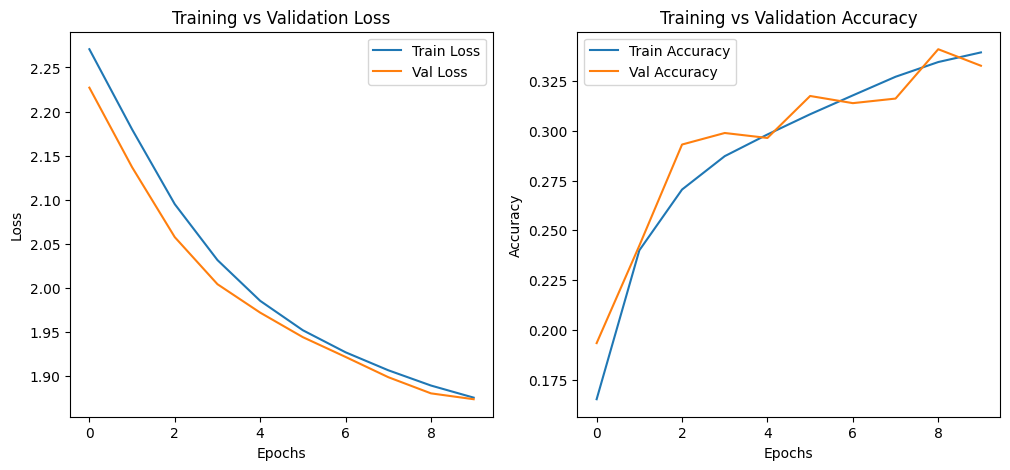

In [7]:
# =====================
# 6. Plot Loss & Accuracy
# =====================
plt.figure(figsize=(12,5))

# Training vs Validation Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")

# Training vs Validation Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")

plt.show()
